 ## 1. Variation and variability:
#### A random sample of 10,000 observational cases are taken from 2020 US Census data on income. The response variable: yearly income ($). Note that the data has been cleaned to remove people who were not employed and/or income was reported as 0. Thus, n = 4,365.


In [30]:
import pandas as pd

In [31]:
census_df = pd.read_excel('Wages_2020Census_cleaned.xlsx') 

In [32]:
census_df.head()

,Age,Sex,Marital_status,Number_of_children,Family_size,Education-degree_recode,Education-degree_recode 2,Education,Race_ethnicity-multi_recode,Immigrate-year,Birthplace_recode,Speaks_English,Employment_status,Income-wages,Region_recode,Region-division_recode,Moved,Year,state
0,30,Male,"Married, spouse present",2,4,Masterâ€™s or professional degree,Master or professional degree,Master or PhD or professional degree,Non-Hispanic White,0,"U.S. state, territory, or outlying region","Yes, speaks only English",Employed,63000,South,East South Central,Same house,2020,Tennessee
1,28,Female,"Married, spouse present",1 child present,3,Masterâ€™s or professional degree,Master or professional degree,Master or PhD or professional degree,Non-Hispanic White,0,"U.S. state, territory, or outlying region","Yes, speaks only English",Employed,46000,South,East South Central,Same house,2020,Tennessee
2,34,Male,"Married, spouse present",1 child present,3,Bachelorâ€™s degree,Bachelor degree,Associate or Bachelor degree,Non-Hispanic White,0,"U.S. state, territory, or outlying region","Yes, speaks only English",Employed,45000,South,East South Central,Same house,2020,Tennessee
3,58,Female,"Married, spouse absent",1 child present,2,"1 or more years of college, no degree","1 or more years of college, no degree","1 or more years of college, no degree",Non-Hispanic White,0,"U.S. state, territory, or outlying region","Yes, speaks only English",Employed,55000,South,East South Central,Same house,2020,Tennessee
4,39,Male,Never married/single,0 children present,1,Bachelorâ€™s degree,Bachelor degree,Associate or Bachelor degree,Non-Hispanic White,0,"U.S. state, territory, or outlying region","Yes, speaks only English",Employed,12000,South,East South Central,Same house,2020,Tennessee


In [9]:
census_df.columns

Index(['Age', 'Sex', 'Marital_status', 'Number_of_children', 'Family_size',
       'Education-degree_recode', 'Education-degree_recode 2', 'Education',
       'Race_ethnicity-multi_recode', 'Immigrate-year', 'Birthplace_recode',
       'Speaks_English', 'Employment_status', 'Income-wages', 'Region_recode',
       'Region-division_recode', 'Moved', 'Year', 'state'],
      dtype='object')

### (a) What is a ’typical’ yearly income for these 4,365 people? (3 marks)

In [10]:
# Compute the mean and median of the 'income' column
mean_income = census_df['Income-wages'].mean()
median_income = census_df['Income-wages'].median()

# Display the results
print("Mean Yearly Income:", mean_income)
print("Median Yearly Income:", median_income)



Mean Yearly Income: 58704.16494845361
Median Yearly Income: 41000.0


### (b) Do the yearly incomes of these 4,365 people vary? How do you know? (2 marks)

In [15]:
income_range = census_df['Income-wages'].max() - census_df['Income-wages'].min()
std_dev = census_df['Income-wages'].std()
iqr = census_df['Income-wages'].quantile(0.75) - census_df['Income-wages'].quantile(0.25)

print("Range of Yearly Incomes:", income_range)
print("Standard Deviation of Incomes:", std_dev)
print("Interquartile Range (IQR):", iqr)


Range of Yearly Incomes: 660970
Standard Deviation of Incomes: 68338.0614351565
Interquartile Range (IQR): 49000.0


### (c) What would the values of the standard deviation and IQR be if there was no variability in yearly income for these 4,365 people? 

###  (d) What would the values of the mean, median, Q1, Q3, minimum and maximum yearly incomes be if there was no variability? (5 marks

### (e) What do you think are some possible causes or reasons or potential sources of the variability in the yearly incomes of these 4,365 people? (Hint: Perform bivariate analysis leveraging boxplots between response variable and education level, region of the US. Provide an explanation of your thinking with numerical support)

https://www.scribbr.com/statistics/variability/

# 2. Exploratory Data Analysis:
### The student performance dataset provides a detailed overview of student performance in various schools, focusing on academic achievements and demographic factors.

In [1]:
#import libraries
import pandas as pd

In [2]:
students_df = pd.read_csv('student_performance_data.csv')
students_df.head()

,StudentID,Gender,Age,StudyHoursPerWeek,AttendanceRate,GPA,Major,PartTimeJob,ExtraCurricularActivities
0,1,Male,24,37,90.75,3.47,Arts,Yes,No
1,2,Female,22,37,74.90,2.32,Education,No,No
2,3,Male,22,10,53.36,2.38,Business,No,No
3,4,Male,24,10,70.26,3.46,Science,Yes,No
4,5,Male,18,19,74.87,2.31,Education,Yes,No


In [33]:
students_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   StudentID                  500 non-null    int64  
 1   Gender                     500 non-null    object 
 2   Age                        500 non-null    int64  
 3   StudyHoursPerWeek          500 non-null    int64  
 4   AttendanceRate             500 non-null    float64
 5   GPA                        500 non-null    float64
 6   Major                      500 non-null    object 
 7   PartTimeJob                500 non-null    object 
 8   ExtraCurricularActivities  500 non-null    object 
dtypes: float64(2), int64(3), object(4)
memory usage: 35.3+ KB


### (a) For each gender, which major has the highest total study hours per week? 

In [34]:
# Grouping the data by Gender and Major, then summing StudyHoursPerWeek
study_hours = students_df.groupby(['Gender', 'Major'])['StudyHoursPerWeek'].sum()

# Find the major with the highest total study hours for each gender
highest_study_hours_per_gender = study_hours.groupby('Gender').idxmax()

# Display the result
print(highest_study_hours_per_gender)

Gender
Female    (Female, Business)
Male       (Male, Education)
Name: StudyHoursPerWeek, dtype: object


### (b) Which gender has the highest overall average attendance rate? Return the gender and the average attendance rate?

In [36]:
# Calculating the mean attendance rate for each gender
average_attendance_by_gender = students_df.groupby('Gender')['AttendanceRate'].mean()

# Finding the gender with the highest average attendance rate
highest_attendance_gender = average_attendance_by_gender.idxmax()
highest_attendance_rate = average_attendance_by_gender.max()

highest_attendance_gender, highest_attendance_rate


('Female', np.float64(75.9257421875))

### (c) What percentage of students have part-time jobs, and what percentage have no part-time jobs?

In [38]:
# Calculating the percentage of students with and without part-time jobs
part_time_job_counts = students_df['PartTimeJob'].value_counts(normalize=True) * 100

# Formatting the results into a readable format
part_time_job_percentage = part_time_job_counts.reset_index()
part_time_job_percentage.columns = ['PartTimeJob', 'Percentage']

part_time_job_percentage

,PartTimeJob,Percentage
0,Yes,53.6
1,No,46.4


### (d) For each gender, what is the mean GPA and variance of age? 

In [39]:
# Grouping the data by 'Gender' and calculating the mean GPA and variance of age
gender_statistics = students_df.groupby('Gender').agg(
    MeanGPA=('GPA', 'mean'),
    AgeVariance=('Age', 'var')
).reset_index()

# Displaying the results
print(gender_statistics)

   Gender   MeanGPA  AgeVariance
0  Female  2.995352     4.005637
1    Male  2.974467     3.960130


### (e) Create a visualization that effectively shows if there is a relationship between any two variables of your choice. Your answer must be given in a single pipe.

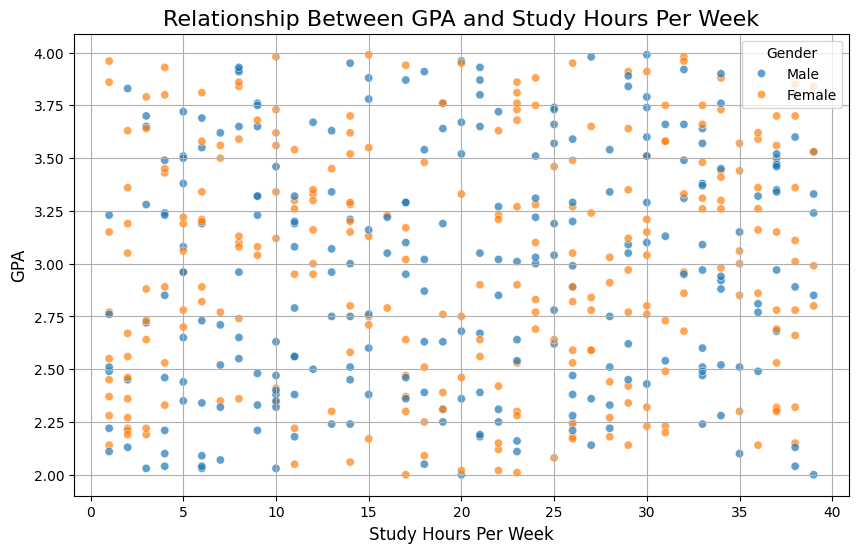

In [41]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a scatter plot to visualize the relationship between GPA and StudyHoursPerWeek
plt.figure(figsize=(10, 6))
sns.scatterplot(data=students_df, x='StudyHoursPerWeek', y='GPA', hue='Gender', alpha=0.7)

# Add titles and labels
plt.title('Relationship Between GPA and Study Hours Per Week', fontsize=16)
plt.xlabel('Study Hours Per Week', fontsize=12)
plt.ylabel('GPA', fontsize=12)
plt.legend(title='Gender')
plt.grid(True)

# Show the plot
plt.show()


# 3. Linear regression 

Linear regression aims to predict a continuous target variable by finding the best-fit linear relation
ship between the target and the input features. The algorithm models the relationship using a linear
 equation: y = β0 + β1x + ϵ, where; y is the dependent variable, β’s are the coefficients (weights),
 x’s are the independent variables, ϵ is the error term. The goal is to find the coefficients (β’s) that
 minimize the difference between the predicted values and the actual values. This is typically done by
 minimizing the Mean Squared Error (MSE):
 MSE = 1
 n 
n
 i=1
 (y −y)2
 (1)
 (a) Briefly describe the steps involved in fitting a linear regression in Python? (2 marks)
 (b) What assumptions does the linear regression take into consideration? (3 marks)
 (c) Using the 2020 US Census dataset, train a simple linear regression predicting a continuous tar
get variable using the scikit-learn library. From the output coefficients, generate an equation
 representing the trained simple linear regression? (3 amrks)
 (d) Compute the Mean Absolute Error (MSE) from your model. (2 marks)
 (e) Extract and interprete the key outputs from a linear regression model (5 marks)
 (f) Plot the linear regression model (5 marks)

In [3]:
#importing the necessary libraries
import pandas as pd
import numpy as np

In [4]:
#importing the dataset
census_df = pd.read_excel('Wages_2020Census_cleaned.xlsx')  

In [5]:
census_df.columns

Index(['Age', 'Sex', 'Marital_status', 'Number_of_children', 'Family_size',
       'Education-degree_recode', 'Education-degree_recode 2', 'Education',
       'Race_ethnicity-multi_recode', 'Immigrate-year', 'Birthplace_recode',
       'Speaks_English', 'Employment_status', 'Income-wages', 'Region_recode',
       'Region-division_recode', 'Moved', 'Year', 'state'],
      dtype='object')

In [6]:
census_df.head()

,Age,Sex,Marital_status,Number_of_children,Family_size,Education-degree_recode,Education-degree_recode 2,Education,Race_ethnicity-multi_recode,Immigrate-year,Birthplace_recode,Speaks_English,Employment_status,Income-wages,Region_recode,Region-division_recode,Moved,Year,state
0,30,Male,"Married, spouse present",2,4,Masterâ€™s or professional degree,Master or professional degree,Master or PhD or professional degree,Non-Hispanic White,0,"U.S. state, territory, or outlying region","Yes, speaks only English",Employed,63000,South,East South Central,Same house,2020,Tennessee
1,28,Female,"Married, spouse present",1 child present,3,Masterâ€™s or professional degree,Master or professional degree,Master or PhD or professional degree,Non-Hispanic White,0,"U.S. state, territory, or outlying region","Yes, speaks only English",Employed,46000,South,East South Central,Same house,2020,Tennessee
2,34,Male,"Married, spouse present",1 child present,3,Bachelorâ€™s degree,Bachelor degree,Associate or Bachelor degree,Non-Hispanic White,0,"U.S. state, territory, or outlying region","Yes, speaks only English",Employed,45000,South,East South Central,Same house,2020,Tennessee
3,58,Female,"Married, spouse absent",1 child present,2,"1 or more years of college, no degree","1 or more years of college, no degree","1 or more years of college, no degree",Non-Hispanic White,0,"U.S. state, territory, or outlying region","Yes, speaks only English",Employed,55000,South,East South Central,Same house,2020,Tennessee
4,39,Male,Never married/single,0 children present,1,Bachelorâ€™s degree,Bachelor degree,Associate or Bachelor degree,Non-Hispanic White,0,"U.S. state, territory, or outlying region","Yes, speaks only English",Employed,12000,South,East South Central,Same house,2020,Tennessee


In [7]:
census_df.tail()

,Age,Sex,Marital_status,Number_of_children,Family_size,Education-degree_recode,Education-degree_recode 2,Education,Race_ethnicity-multi_recode,Immigrate-year,Birthplace_recode,Speaks_English,Employment_status,Income-wages,Region_recode,Region-division_recode,Moved,Year,state
4360,67,Male,"Married, spouse present",0 children present,2,Bachelorâ€™s degree,Bachelor degree,Associate or Bachelor degree,Non-Hispanic White,0,"U.S. state, territory, or outlying region","Yes, speaks only English",Employed,40000,Midwest,West North Central,Same house,2020,North Dakota
4361,48,Male,"Married, spouse present",4,6,Associateâ€™s degree,Associate degree,Associate or Bachelor degree,Non-Hispanic White,0,"U.S. state, territory, or outlying region","Yes, speaks only English",Employed,65000,Midwest,West North Central,Same house,2020,North Dakota
4362,33,Male,"Married, spouse absent",0 children present,1,Associateâ€™s degree,Associate degree,Associate or Bachelor degree,Non-Hispanic Black,2017,Africa,"Yes, speaks very well",Employed,45000,Midwest,West North Central,Same house,2020,North Dakota
4363,22,Female,Never married/single,0 children present,2,"1 or more years of college, no degree","1 or more years of college, no degree","1 or more years of college, no degree",Non-Hispanic White,0,"U.S. state, territory, or outlying region","Yes, speaks only English",Employed,500,Midwest,West North Central,Same house,2020,North Dakota
4364,49,Female,"Married, spouse present",2,4,Masterâ€™s or professional degree,Master or professional degree,Master or PhD or professional degree,Non-Hispanic White,0,"U.S. state, territory, or outlying region","Yes, speaks only English",Employed,498000,Midwest,West North Central,Same house,2020,North Dakota


In [8]:
census_df.info

<bound method DataFrame.info of       Age     Sex           Marital_status  Number_of_children  Family_size  \
0      30    Male  Married, spouse present                   2            4   
1      28  Female  Married, spouse present     1 child present            3   
2      34    Male  Married, spouse present     1 child present            3   
3      58  Female   Married, spouse absent     1 child present            2   
4      39    Male     Never married/single  0 children present            1   
...   ...     ...                      ...                 ...          ...   
4360   67    Male  Married, spouse present  0 children present            2   
4361   48    Male  Married, spouse present                   4            6   
4362   33    Male   Married, spouse absent  0 children present            1   
4363   22  Female     Never married/single  0 children present            2   
4364   49  Female  Married, spouse present                   2            4   

                   

In [9]:
census_df.describe()

,Age,Family_size,Immigrate-year,Income-wages,Year
count,4365.000000,4365.000000,4365.000000,4365.000000,4365.0
mean,41.688889,2.964490,360.903551,58704.164948,2020.0
std,14.287954,1.603552,769.040850,68338.061435,0.0
min,16.000000,1.000000,0.000000,30.000000,2020.0
25%,30.000000,2.000000,0.000000,22000.000000,2020.0
50%,41.000000,3.000000,0.000000,41000.000000,2020.0
75%,53.000000,4.000000,0.000000,71000.000000,2020.0
max,87.000000,14.000000,2020.000000,661000.000000,2020.0


In [10]:
census_df.shape

(4365, 19)

### (a) Briefly describe the steps involved in fitting a linear regression in Python? (2 marks)

### (b) What assumptions does the linear regression take into consideration? (3 marks)

1. Linearity: The independent variables have a linear relationship
2. The independent variables must be identically independednt.
3. Homoscedascity: There is a constant variance of errors
4. Error must follow a normal distribution curve.

### (c) Using the 2020 US Census dataset, train a simple linear regression predicting a continuous target variable using the scikit-learn library. From the output coefficients, generate an equation representing the trained simple linear regression? (3 amrks)

In [11]:
# 1) import the necessary packages

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [12]:
#2)Define the data going to be used 

#independent variables StudyHoursPerWeek and AttendanceRate, call them x
x = census_df[['Age']]  # Predictor


#dependent variable GPA, call it y
y = census_df['Income-wages']  # Target

In [13]:
regr = LinearRegression()

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

#Call fit() method to train the model
regr.fit(X_train, y_train)

#Predict Income on test data
predictedIncomeWages= regr.predict(X_test)
print(predictedIncomeWages)

[42202.03536906 69434.30540949 63080.10906672 76696.24408693
 71249.79007885 45833.00470779 73065.27474821 54002.68571991
 58541.39739332 59449.139728   73065.27474821 54910.4280546
 49463.97404651 97574.31778459 76696.24408693 49463.97404651
 71249.79007885 52187.20105055 65803.33607076 64895.59373608
 42202.03536906 44925.26237311 63080.10906672 71249.79007885
 58541.39739332 78511.7287563  44017.52003843 90312.37910715
 63987.8514014  44925.26237311 44925.26237311 48556.23171183
 58541.39739332 48556.23171183 39478.80836502 62172.36673204
 57633.65505864 43109.77770375 80327.21342566 70342.04774417
 76696.24408693 58541.39739332 61264.62439736 56725.91272396
 44017.52003843 71249.79007885 68526.56307481 44925.26237311
 68526.56307481 68526.56307481 56725.91272396 72157.53241353
 46740.74704247 50371.71638119 49463.97404651 78511.7287563
 36755.58136098 54002.68571991 77603.98642161 60356.88206268
 41294.29303438 44017.52003843 75788.50175225 65803.33607076
 36755.58136098 57633.6550

In [14]:
# Coefficient 
print("Coefficient:", regr.coef_)  

#intercept
print("Intercept:", regr.intercept_)  

Coefficient: [907.74233468]
Intercept: 21323.96167140681


In [15]:
#REGRESSION EQUATION
y = mx + b
#y: target variable(income), m: coefficient, x:independent variable(age), b:slope(intercept)

Income = 907.74 * age + 21323.96

NameError: name 'mx' is not defined

### (e) Extract and interprete the key outputs from a linear regression model (5 marks)

### (f) Plot the linear regression model (5 marks)

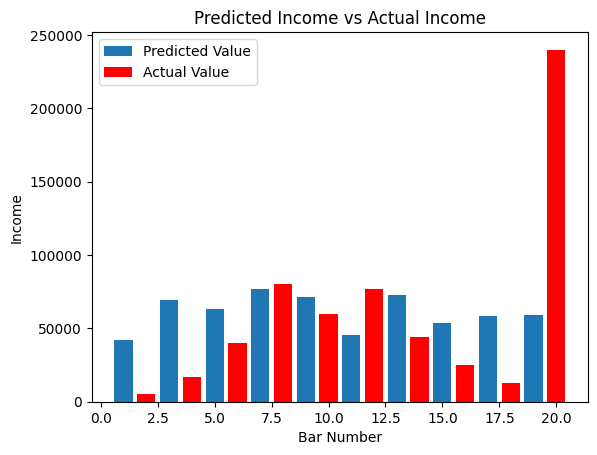

In [16]:

# # Example of actual model prediction
predicted_income = regr.predict(X_test)  # Model predictions for test set
# y_test = actual_test_values  # Actual income values (target values from test set)

# Plotting
plt.bar([1, 3, 5, 7, 9, 11, 13, 15, 17, 19],predictedIncomeWages[:10], label='Predicted Value')
plt.bar([2, 4, 6, 8, 10, 12, 14, 16, 18, 20], y_test[:10], label='Actual Value', color='r')
plt.legend()
plt.xlabel('Bar Number')
plt.ylabel('Income')
plt.title('Predicted Income vs Actual Income')
plt.show()

## 4. Bonus Question.

### (a) Multiply a 5x3 matrix by a 3x2 matrix (real matrix product) (Hint: create a 5x3 and 3x2 matrices and peform matrix multiplication).

In [17]:
# Importing the NumPy library
import numpy as np

# Generating a random array of shape (5, 3)
x = np.random.random((5,3))

# Displaying the first array
print("First array:")
print(x)

# Generating another random array of shape (3, 2)
y = np.random.random((3,2))

# Displaying the second array
print("Second array:")
print(y)

# Computing the dot product of the two arrays
z = np.dot(x, y)

# Displaying the dot product of the arrays
print("Dot product of two arrays:")
print(z) 


First array:
[[0.80526008 0.76768919 0.65146392]
 [0.06181319 0.83890715 0.72985773]
 [0.71466559 0.59197614 0.50250079]
 [0.06123513 0.97428977 0.03806656]
 [0.58536922 0.97671964 0.81618782]]
Second array:
[[0.4081349  0.30380159]
 [0.12367428 0.80406555]
 [0.59244338 0.23035432]]
Dot product of two arrays:
[[0.80955363 1.01197926]
 [0.56137873 0.86144117]
 [0.66259545 0.80885739]
 [0.16803906 0.81076496]
 [0.84324977 1.15119511]]


### (b) Create a 3x3 identity matrix

In [18]:
# Importing the NumPy library with an alias 'np'
import numpy as np

# Creating a 3x3 identity matrix using np.identity()
identity_matrix = np.identity(3)

# Printing a message indicating a 3x3 matrix
print('3x3 matrix:')

# Printing the 3x3 identity matrix
print(identity_matrix) 


3x3 matrix:
[[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]]


### (c) Create a vector with values ranging from 10 to 49).

In [19]:
# Creating a NumPy array 'v' containing integers from 15 to 54 using np.arange()
array = np.arange(10, 49)

# Printing the array to see the output
print(array)

[10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33
 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48]


### (d) Create a null vector of size 10.

In [20]:
null_vector = np.zeros(10)

print(null_vector)

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


###  (e) Create a 3x3x3 array with random values

In [21]:
Z = np.diag(1+np.arange(4),k=-1)
print(Z)

[[0 0 0 0 0]
 [1 0 0 0 0]
 [0 2 0 0 0]
 [0 0 3 0 0]
 [0 0 0 4 0]]


In [22]:
x_random = np.random.random((3, 3, 3))

# Printing the array 'x_random'
print(x_random) 

[[[0.28752809 0.71754942 0.01636972]
  [0.98944125 0.22185593 0.47326882]
  [0.53614265 0.22315256 0.40091751]]

 [[0.60276018 0.84963171 0.74693268]
  [0.70132723 0.98998048 0.61077507]
  [0.03322567 0.96731772 0.35082629]]

 [[0.01080571 0.55056188 0.92026421]
  [0.47824962 0.95740326 0.56435017]
  [0.59716959 0.30170467 0.40014536]]]


### (f) Create a 5x5 matrix with values 1,2,3,4 just below the diagonal

In [23]:
Z = np.diag(1+np.arange(4),k=-1)
print(Z)

[[0 0 0 0 0]
 [1 0 0 0 0]
 [0 2 0 0 0]
 [0 0 3 0 0]
 [0 0 0 4 0]]


###  (g) Normalize a 5x5 random matrix

In [25]:
random_matrix = np.random.rand(5, 5)
random_matrix

array([[0.01662105, 0.07475811, 0.95491323, 0.31435685, 0.1622775 ],
       [0.53396188, 0.49739518, 0.45232024, 0.98648055, 0.03157211],
       [0.60887448, 0.75705251, 0.41138151, 0.46101161, 0.16228316],
       [0.76942482, 0.52628978, 0.13316889, 0.17344688, 0.1441999 ],
       [0.27965676, 0.50442273, 0.83007334, 0.1240258 , 0.15901229]])

### (h) How to get the dates of yesterday, today and tomorrow?

In [26]:
# today's date 
today = np.datetime64('today', 'D') 
print("Today: ", today) 
  
# yesterday's date 
yesterday = np.datetime64('today', 'D') 
- np.timedelta64(1, 'D') 
  
print("Yesterday: ", yesterday) 
  
#tomorrow's date
tomorrow = np.datetime64('today', 'D') 
+ np.timedelta64(1, 'D') 
  
print("Tomorrow: ", tomorrow) 

Today:  2024-12-13
Yesterday:  2024-12-13
Tomorrow:  2024-12-13


###  (i) Find indices of non-zero elements from [1,2,0,0,4,0]. 

In [27]:
# Define the array
array = np.array([1, 2, 0, 0, 4, 0])

# Find indices of non-zero elements
non_zero_indices = np.nonzero(array)[0]

# Print the result
print(non_zero_indices)

[0 1 4]


### REFERENCES

1. Class notes: Mathematical computing
2. https://www.geeksforgeeks.org/
3. https://www.w3resource.com/